In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
import tensorflow.keras.backend as K

In [2]:
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [3]:
#normalization
x_train=x_train/255.0
y_train=y_train/255.0

In [4]:
print(x_train.shape)
print(y_train.shape)

(50000, 32, 32, 3)
(50000, 1)


In [5]:
model = Sequential([
    Flatten(input_shape=(32, 32, 3)),
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(10, activation='softmax')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [6]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [8]:
history = model.fit(
    x_train, y_train,
    epochs=10,
    batch_size=64,
    validation_split=0.2
)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 21s 33ms/step - accuracy: 0.1008 - loss: 0.0345 - val_accuracy: 0.1014 - val_loss: 1.8225e-08
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 19s 30ms/step - accuracy: 0.1003 - loss: 0.0000e+00 - val_accuracy: 0.1014 - val_loss: 1.8225e-08
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 20s 31ms/step - accuracy: 0.0964 - loss: 0.0000e+00 - val_accuracy: 0.1014 - val_loss: 1.8225e-08
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 18s 29ms/step - accuracy: 0.0992 - loss: 0.0000e+00 - val_accuracy: 0.1014 - val_loss: 1.8225e-08
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 18s 29ms/step - accuracy: 0.1004 - loss: 0.0000e+00 - val_accuracy: 0.1014 - val_loss: 1.8225e-08
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 17s 28ms/step - accuracy: 0.0973 - loss: 0.0000e+00 - val_accuracy: 0.1014 - val_loss: 1.8225e-08
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 17s 28ms/step - accuracy: 0.0983 - loss: 0.0000e+00 - val_accuracy: 0.1014 - val_loss: 1.8225e-08
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━

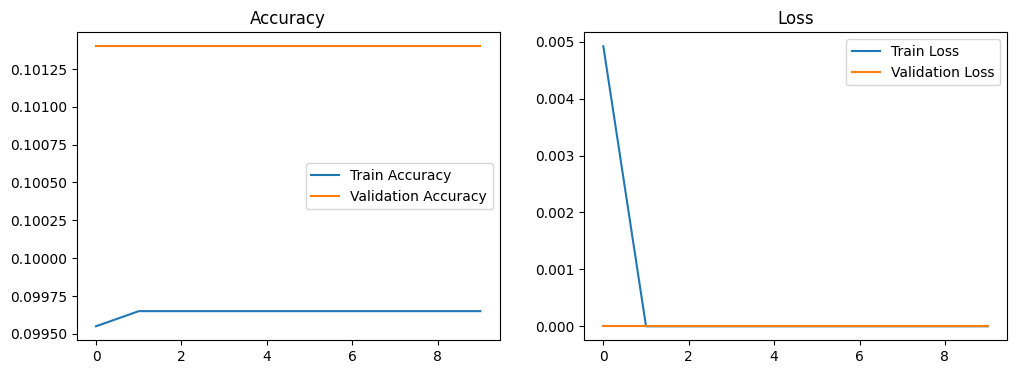

In [15]:
plt.figure(figsize=(12,4))
#accuracy plot
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.legend()
#loss plot
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.legend()

plt.show()


In [16]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test Accuracy:", test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.1001 - loss: 37754.3125
Test Accuracy: 0.10000000149011612


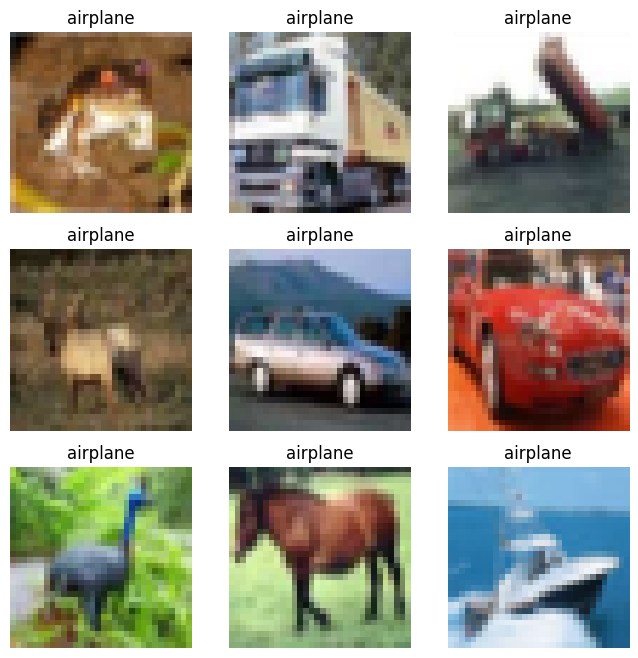

In [18]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(8,8))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(x_train[i])
    plt.title(class_names[y_train[i].astype(int)[0]])
    plt.axis('off')
plt.show()